<a href="https://www.kaggle.com/code/sonawanelalitsunil/smart-restaurant-ratings-100?scriptVersionId=219061715" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


#### Bangalore: The Vibrant Hub of Technology, Culture, and Cuisine

Bangalore, officially known as Bengaluru, is the capital and largest city of Karnataka, India. With a population exceeding 15 million, it stands as the third-largest city in India and ranks as the 27th largest city in the world. Renowned for its diversity and vibrancy, Bangalore is one of the most ethnically diverse cities in India, where over 51% of its residents are migrants from other regions of the country. This melting pot of cultures makes Bangalore a dynamic and inclusive urban space.

The Silicon Valley of India
Bangalore is often referred to as the “Silicon Valley of India” or the “IT Capital of India” due to its pivotal role as the nation’s leading exporter of information technology (IT) services. The city houses numerous multinational corporations, startups, and innovation hubs, cementing its reputation as a global tech powerhouse. Its ecosystem fosters innovation, entrepreneurship, and a progressive mindset, attracting talent from across the globe.

A Foodie’s Paradise
Bangalore’s culinary scene is as diverse as its population. From traditional South Indian delicacies to international cuisines, the city boasts a unique food culture that caters to every palate. Restaurants serving dishes from all corners of the world can be found here, making it a haven for food enthusiasts.

The city is home to over 12,000 active restaurants, and this number continues to rise. From quaint cafés to fine dining establishments, Bangalore offers an endless variety of options for its residents and visitors. The vibrant food culture has earned Bangalore the reputation of being one of the best places in India for food lovers.

The Growing Food Industry
The booming food industry in Bangalore reflects the city’s dynamic growth and changing consumer preferences. With the increasing number of restaurants and culinary innovations, the food scene in Bangalore continues to thrive. The city's rapid urbanization and diverse population contribute to the ever-expanding variety of cuisines and dining experiences available.

Why Explore Bangalore’s Food Data?
The rapid growth of the restaurant industry and the wide array of cuisines in Bangalore make it an exciting subject for data exploration. Analyzing this data can reveal fascinating insights, such as:

Popular cuisines and dining trends.
Customer preferences and satisfaction levels.
The impact of Bangalore’s diversity on its food culture.
The rise of innovative dining concepts and restaurant chains.
Bangalore’s unique combination of being a technology hub and a food lover’s paradise makes it the perfect city to explore the intersection of data, culture, and gastronomy. For anyone curious about understanding the dynamics of the food industry or uncovering hidden patterns in culinary trends, Bangalore provides an ideal backdrop for discovery.

## Dataset Description
This dataset provides comprehensive information about restaurants in Bangalore, sourced from the Zomato website. It includes features related to restaurant details, ratings, reviews, and customer preferences, making it an excellent resource for analyzing the food and dining trends in the city. Below is a detailed description of the dataset's features:

#### url:

Description: The URL of the restaurant’s page on the Zomato website.
Usage: Useful for referencing additional information about the restaurant directly from the source.
address:

Description: The complete address of the restaurant in Bangalore.
Usage: Helps analyze restaurant distribution across various locations in the city.
#### name:

Description: The name of the restaurant.
Usage: Useful for identifying and grouping restaurant-specific data.
online_order:

Description: Indicates whether the restaurant provides online ordering services (Yes or No).
Usage: Can be used to study the popularity and trends of online food delivery services.
#### book_table:

Description: Specifies whether table booking is available at the restaurant (Yes or No).
Usage: Helps analyze the demand for dine-in reservations.
#### rate:

Description: The overall rating of the restaurant (out of 5) based on customer feedback.
Usage: Allows assessment of customer satisfaction and quality of service.
#### votes:

Description: The total number of votes/upvotes received by the restaurant.
Usage: Serves as an indicator of customer engagement and popularity.
#### phone:

Description: The contact number of the restaurant.
Usage: Useful for operational and customer service analyses.
#### location:

Description: The neighborhood or area where the restaurant is located.
Usage: Allows spatial analysis of restaurants within Bangalore.
#### rest_type:

Description: The type of restaurant (e.g., café, quick bites, fine dining).
Usage: Helps classify restaurants based on their service style.
#### dish_liked:

Description: The dishes most liked by customers at the restaurant.
Usage: Useful for identifying customer preferences and popular menu items.
#### cuisines:

Description: The types of cuisines offered at the restaurant (e.g., Indian, Chinese, Italian).
Usage: Helps analyze the diversity and availability of food styles in the city.
#### approx_cost(for two people):

Description: The approximate cost of a meal for two people in INR.
Usage: Useful for categorizing restaurants into different pricing tiers.
#### reviews_list:

Description: A list of tuples containing customer reviews for the restaurant. Each tuple includes a rating and the corresponding review text.
Usage: Allows sentiment analysis and understanding of customer experiences.
#### menu_item:

Description: A list of menu items available at the restaurant.
Usage: Useful for studying menu diversity and offerings across restaurants.
#### listed_in(type):

Description: The type of meal the restaurant is known for (e.g., Buffet, Delivery, Drinks & Nightlife).
Usage: Helps analyze meal-specific trends and restaurant categorization.
listed_in(city):

#### Description: The neighborhood where the restaurant is listed.
Usage: Allows further localization and clustering of restaurant data.

# <p style="padding:10px;background-color:red;margin:0;color:pink;font-family:newtimeroman;font-size:100%;text-align:center;border-radius:15px 50px;overflow:hidden;font-weight:500;border: 3px solid #16e51e;">Zomato Bangalore Restaurants</p>

# <p style="padding:10px;background-color:#f8df01;margin:0;color:#102d02;font-family:newtimeroman;font-size:100%;text-align:center;border-radius:15px 50px;overflow:hidden;font-weight:500;border: 3px solid #16e51e;">Import Libraries</p>

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

# <p style="padding:10px;background-color:#f8df01;margin:0;color:#102d02;font-family:newtimeroman;font-size:100%;text-align:center;border-radius:15px 50px;overflow:hidden;font-weight:500;border: 3px solid #16e51e;">Load and Prepare the Dataset</p>

In [3]:
data = pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")

In [4]:
data.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [5]:
data.tail()

url  \
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes           phone                    location  \
51712         No  3.6 /5     27    080 40301477                  Whitefield   
51713         No     NaN      0  +91 8197675843                  Whitefield   
51714         No     NaN      0             NaN                  Whitefield   
51715        Yes  4.3 /5    236    080 49652769  ITPL Main Road, Whitefield   
51716         No  3.4 /5     13  +91 8071117272  ITPL Main Road, Whitefield   

                rest_type                    dish_liked  \
51712                 Bar                           NaN   
51713                 Bar                           NaN   
51714                 Bar                           NaN   
51715                 Bar  Cocktails, Pizza, Buttermilk   
51716  Bar, Casual Dining                           NaN   

                                     cuisines approx_cost(for two people)  \
51712                             Continental                       1,500   
51713                             Finger Food                         600   
51714                             Finger Food                       2,000   
51715                             Finger Food                       2,500   
51716  Finger Food, North Indian, Continental                       1,500   

                                            reviews_list menu_item  \
51712  [('Rated 5.0', "RATED\n  Food and service are ...        []   
51713                                                 []        []   
51714                                                 []        []   
51715  [('Rated 4.0', 'RATED\n  Nice and friendly pla...        []   
51716  [('Rated 5.0', 'RATED\n  Great ambience , look...        []   

      listed_in(type) listed_in(city)  
51712   Pubs and bars      Whitefield  
51713   Pubs and bars      Whitefield  
51714   Pubs and bars      Whitefield  
51715   Pubs and bars      Whitefield  
51716   Pubs and bars      Whitefield

In [6]:
data.describe()

votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
data.shape

(51717, 17)

In [9]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [10]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [11]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [12]:
data.drop(['url','address','dish_liked'], axis=1, inplace=True)

In [13]:
data.duplicated().sum()

58

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7762
votes                             0
phone                          1207
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [16]:
import missingno as msno

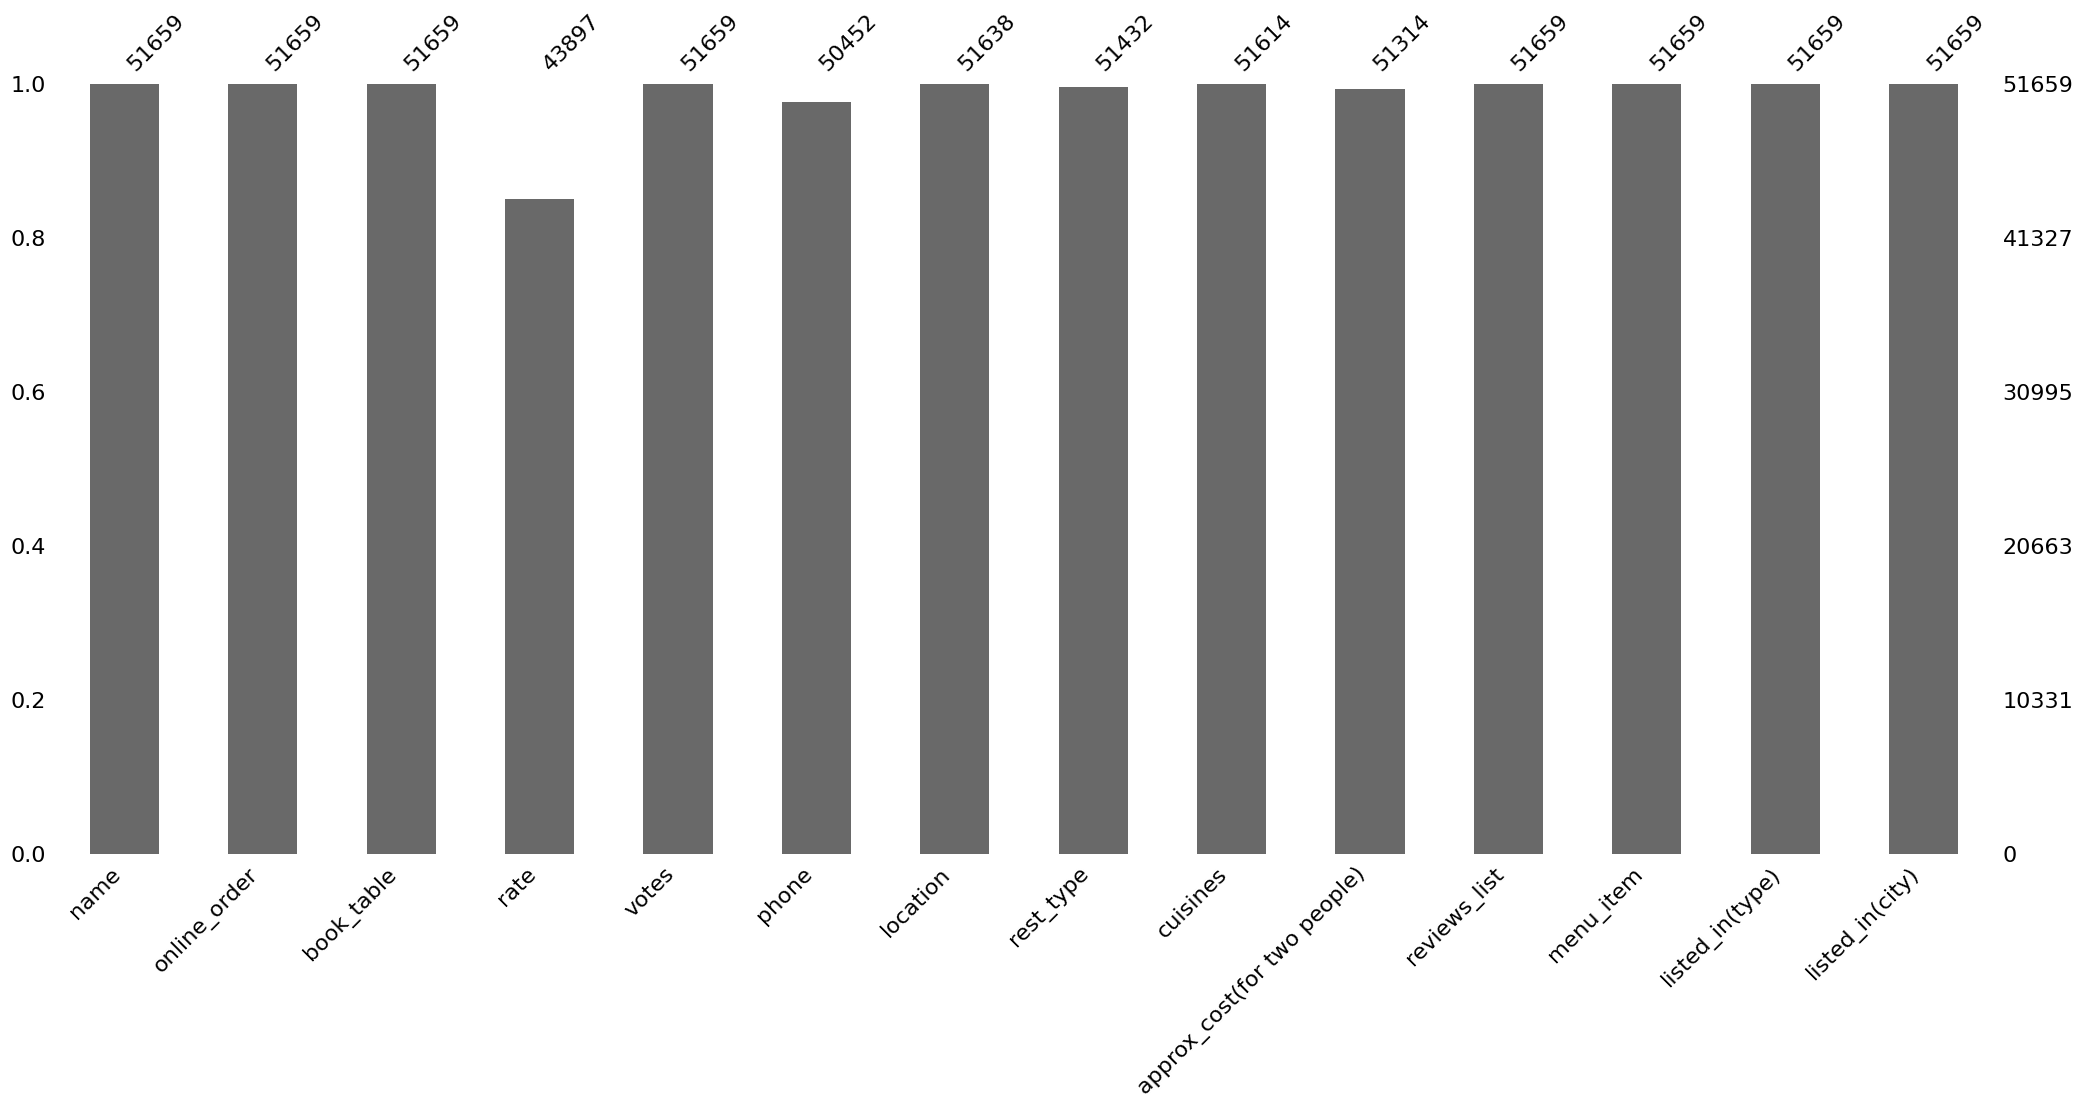

In [17]:
msno.bar(data)
plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51659 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51659 non-null  object
 1   online_order                 51659 non-null  object
 2   book_table                   51659 non-null  object
 3   rate                         43897 non-null  object
 4   votes                        51659 non-null  int64 
 5   phone                        50452 non-null  object
 6   location                     51638 non-null  object
 7   rest_type                    51432 non-null  object
 8   cuisines                     51614 non-null  object
 9   approx_cost(for two people)  51314 non-null  object
 10  reviews_list                 51659 non-null  object
 11  menu_item                    51659 non-null  object
 12  listed_in(type)              51659 non-null  object
 13  listed_in(city)              51659 n

In [19]:
data.dropna(how='any',inplace= True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42900 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         42900 non-null  object
 1   online_order                 42900 non-null  object
 2   book_table                   42900 non-null  object
 3   rate                         42900 non-null  object
 4   votes                        42900 non-null  int64 
 5   phone                        42900 non-null  object
 6   location                     42900 non-null  object
 7   rest_type                    42900 non-null  object
 8   cuisines                     42900 non-null  object
 9   approx_cost(for two people)  42900 non-null  object
 10  reviews_list                 42900 non-null  object
 11  menu_item                    42900 non-null  object
 12  listed_in(type)              42900 non-null  object
 13  listed_in(city)              42900 n

In [21]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'phone',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [22]:
data = data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

In [23]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'phone',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [24]:
data.dtypes

name            object
online_order    object
book_table      object
rate            object
votes            int64
phone           object
location        object
rest_type       object
cuisines        object
cost            object
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

In [25]:
data['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [26]:
data['cost']=data['cost'].astype(str)

In [27]:
data['cost'] = data['cost'].apply(lambda x: x.replace(',','.'))

In [28]:
data['cost'] = data['cost'].astype(float)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42900 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          42900 non-null  object 
 1   online_order  42900 non-null  object 
 2   book_table    42900 non-null  object 
 3   rate          42900 non-null  object 
 4   votes         42900 non-null  int64  
 5   phone         42900 non-null  object 
 6   location      42900 non-null  object 
 7   rest_type     42900 non-null  object 
 8   cuisines      42900 non-null  object 
 9   cost          42900 non-null  float64
 10  reviews_list  42900 non-null  object 
 11  menu_item     42900 non-null  object 
 12  type          42900 non-null  object 
 13  city          42900 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 4.9+ MB


In [30]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [31]:
data = data.loc[data.rate != 'NEW']
data = data.loc[data.rate != '-'].reset_index(drop=True)

remove_slash = lambda x: x.replace('/5', '') if isinstance(x, str) else x
data.rate = data.rate.apply(remove_slash).str.strip().astype('float')

data['rate'].head()


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [32]:
data.name = data.name.apply(lambda x:x.title())
data.online_order.replace(('Yes','No'),(True, False),inplace=True)
data.book_table.replace(('Yes','No'),(True, False),inplace=True)

In [33]:
data.head()

name  online_order  book_table  rate  votes  \
0                  Jalsa          True        True   4.1    775   
1         Spice Elephant          True       False   4.1    787   
2        San Churro Cafe          True       False   3.8    918   
3  Addhuri Udupi Bhojana         False       False   3.7     88   
4          Grand Village         False       False   3.8    166   

                              phone      location            rest_type  \
0    080 42297555\r\n+91 9743772233  Banashankari        Casual Dining   
1                      080 41714161  Banashankari        Casual Dining   
2                    +91 9663487993  Banashankari  Cafe, Casual Dining   
3                    +91 9620009302  Banashankari          Quick Bites   
4  +91 8026612447\r\n+91 9901210005  Basavanagudi        Casual Dining   

                         cuisines   cost  \
0  North Indian, Mughlai, Chinese  800.0   
1     Chinese, North Indian, Thai  800.0   
2          Cafe, Mexican, Italian  800.0   
3      South Indian, North Indian  300.0   
4        North Indian, Rajasthani  600.0   

                                        reviews_list menu_item    type  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []  Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []  Buffet   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []  Buffet   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []  Buffet   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []  Buffet   

           city  
0  Banashankari  
1  Banashankari  
2  Banashankari  
3  Banashankari  
4  Banashankari

In [34]:
def Encode(data):
    for column in data.columns[~data.columns.isin(['rate', 'cost', 'votes'])]:
        data[column] = data[column].factorize()[0]
    return data

data_en = Encode(data.copy())
data_en.head()

name  online_order  book_table  rate  votes  phone  location  rest_type  \
0     0             0           0   4.1    775      0         0          0   
1     1             0           1   4.1    787      1         0          0   
2     2             0           1   3.8    918      2         0          1   
3     3             1           1   3.7     88      3         0          2   
4     4             1           1   3.8    166      4         1          0   

   cuisines   cost  reviews_list  menu_item  type  city  
0         0  800.0             0          0     0     0  
1         1  800.0             1          0     0     0  
2         2  800.0             2          0     0     0  
3         3  300.0             3          0     0     0  
4         4  600.0             4          0     0     0

## Pairplot

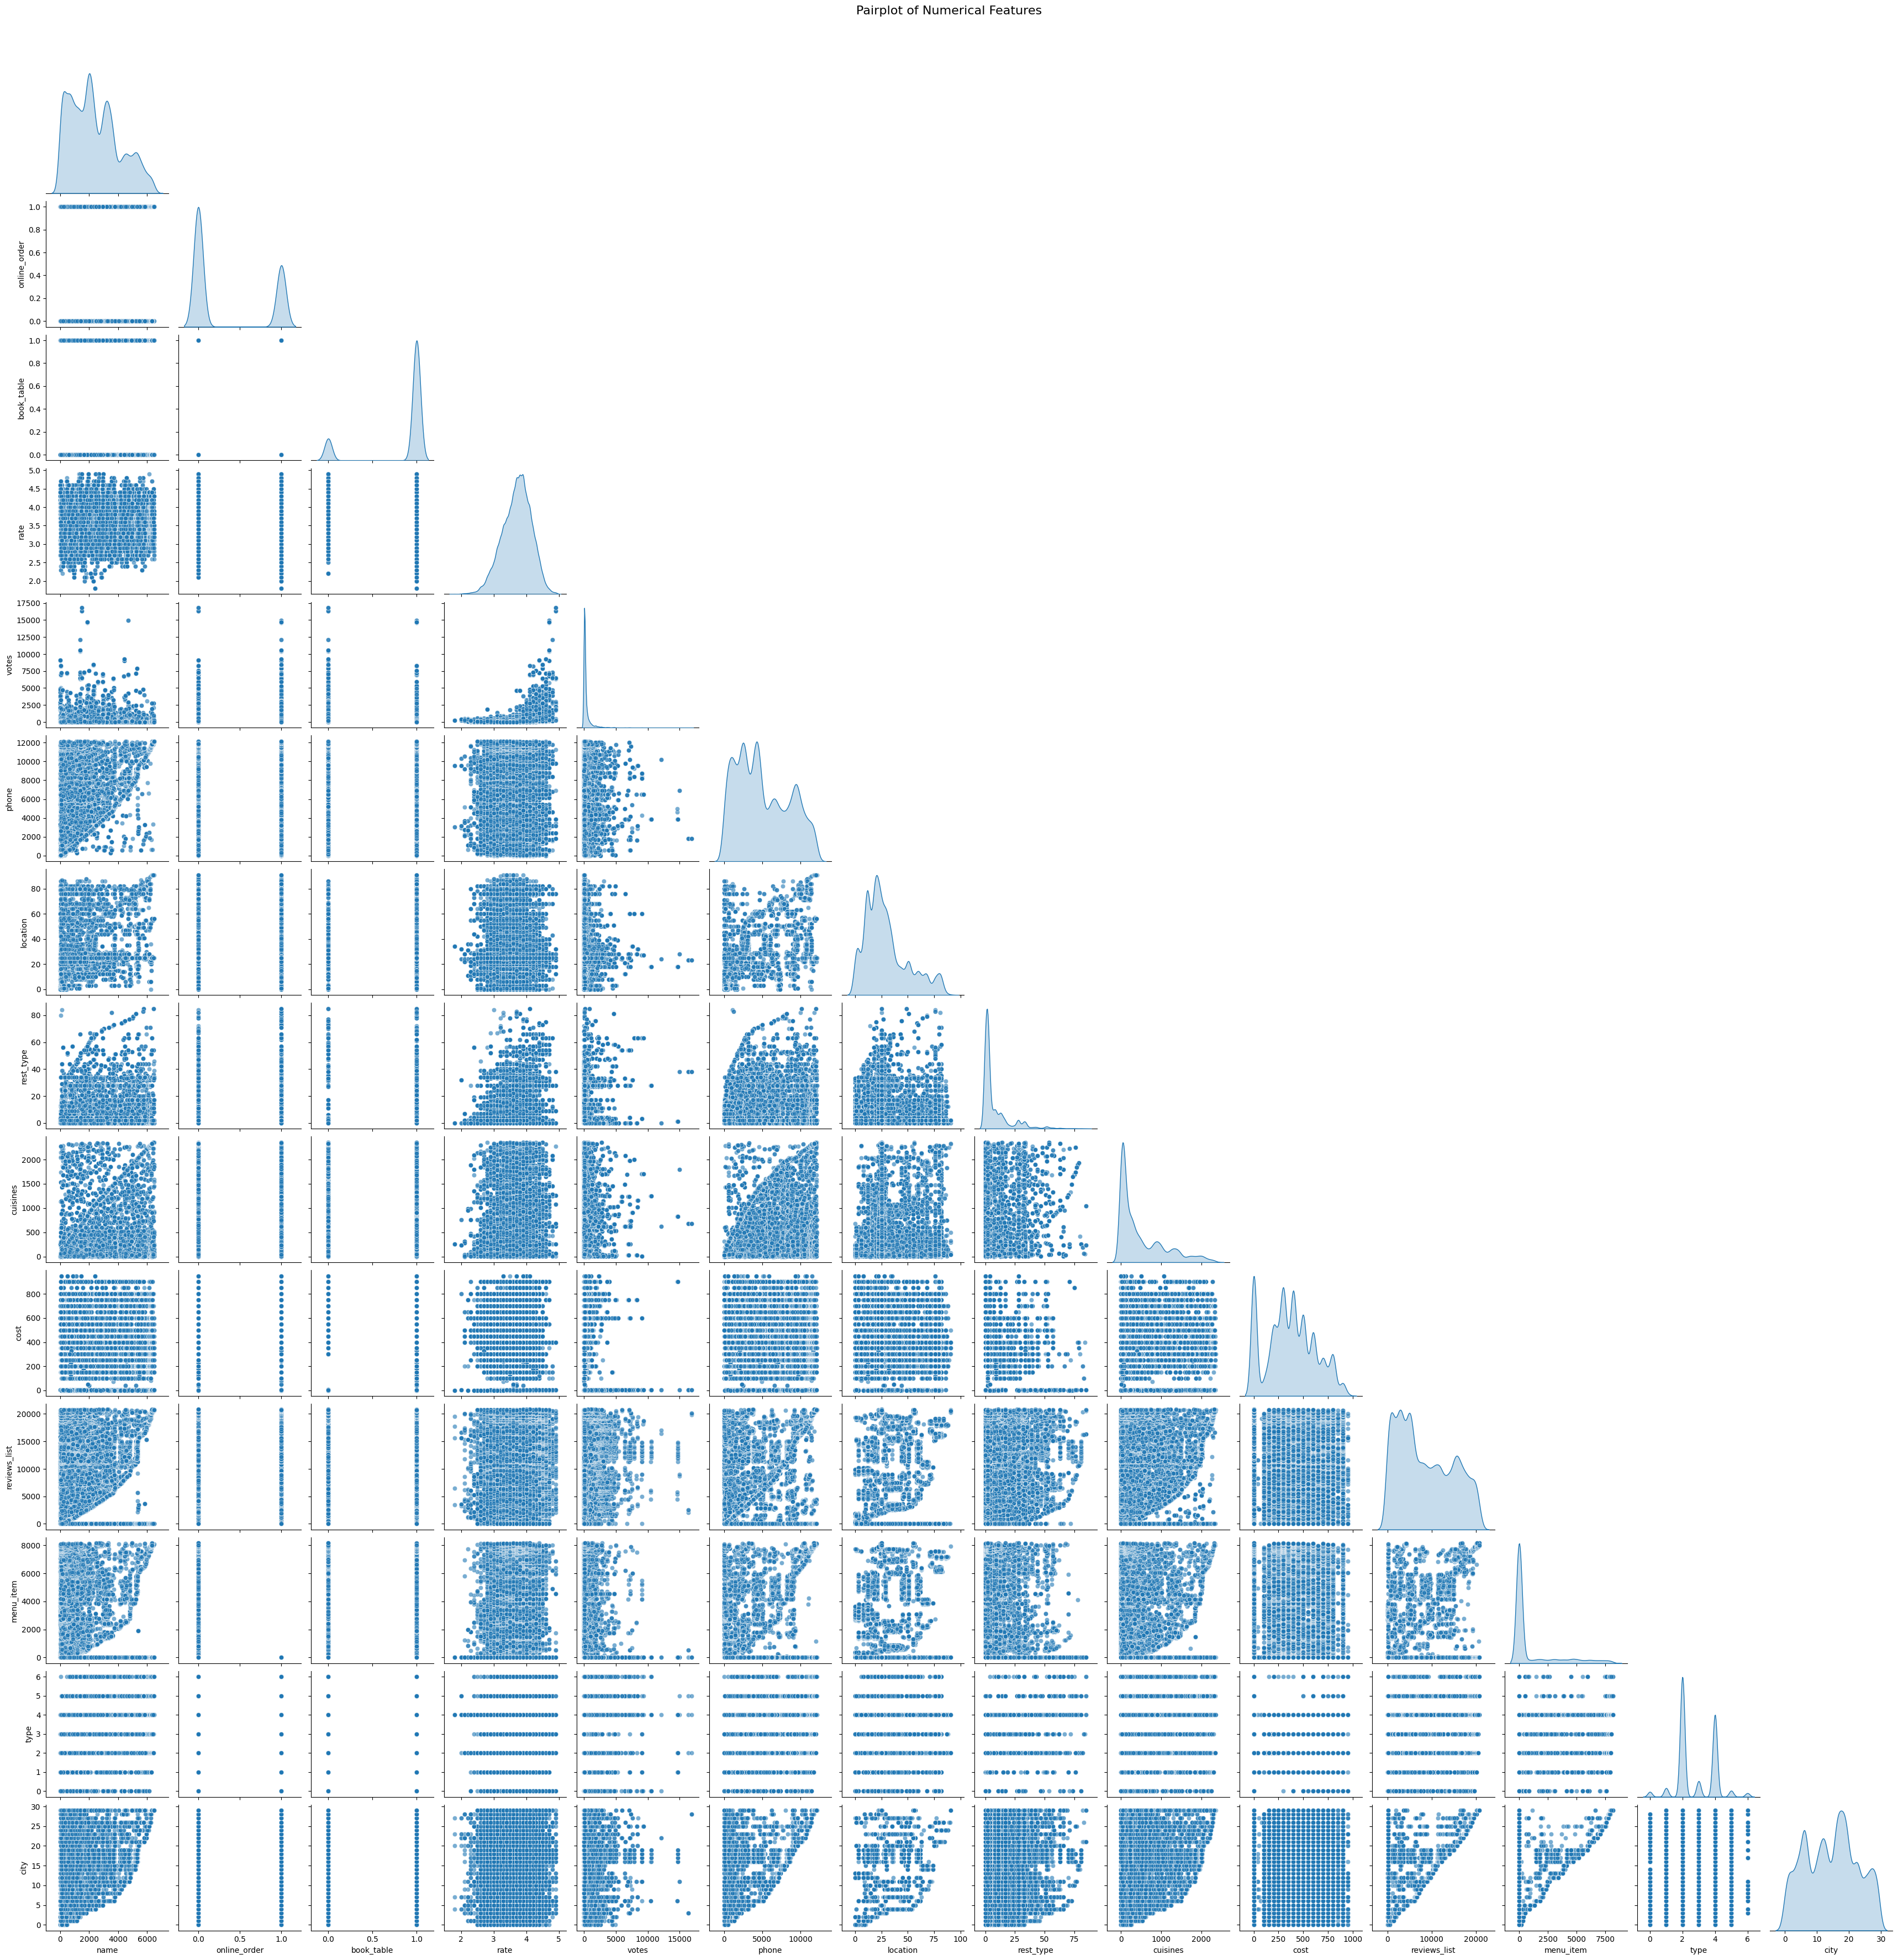

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data_en, kind="scatter", diag_kind="kde", corner=True, plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=16)
plt.show()

# <p style="padding:10px;background-color:#f8df01;margin:0;color:#102d02;font-family:newtimeroman;font-size:100%;text-align:center;border-radius:15px 50px;overflow:hidden;font-weight:500;border: 3px solid #16e51e;">Exploratory Data Anlysis</p>

In [36]:
# Compute correlation using Kendall's method
corr = data_en.corr(method='kendall')

# Display as a table
print("Correlation Matrix (Kendall Method):")
print(corr.round(2))

Correlation Matrix (Kendall Method):
              name  online_order  book_table  rate  votes  phone  location  \
name          1.00          0.20       -0.04 -0.04  -0.09   0.49      0.30   
online_order  0.20          1.00       -0.06 -0.06  -0.13   0.12      0.06   
book_table   -0.04         -0.06        1.00 -0.38  -0.38  -0.04     -0.05   
rate         -0.04         -0.06       -0.38  1.00   0.53   0.00      0.04   
votes        -0.09         -0.13       -0.38  0.53   1.00   0.02      0.04   
phone         0.49          0.12       -0.04  0.00   0.02   1.00      0.36   
location      0.30          0.06       -0.05  0.04   0.04   0.36      1.00   
rest_type     0.01          0.11       -0.05  0.08  -0.04  -0.01      0.04   
cuisines      0.19          0.02       -0.19  0.15   0.15   0.13      0.10   
cost         -0.07         -0.15        0.22 -0.06   0.03  -0.01     -0.03   
reviews_list  0.29          0.04       -0.11  0.12   0.15   0.52      0.30   
menu_item    -0.08         

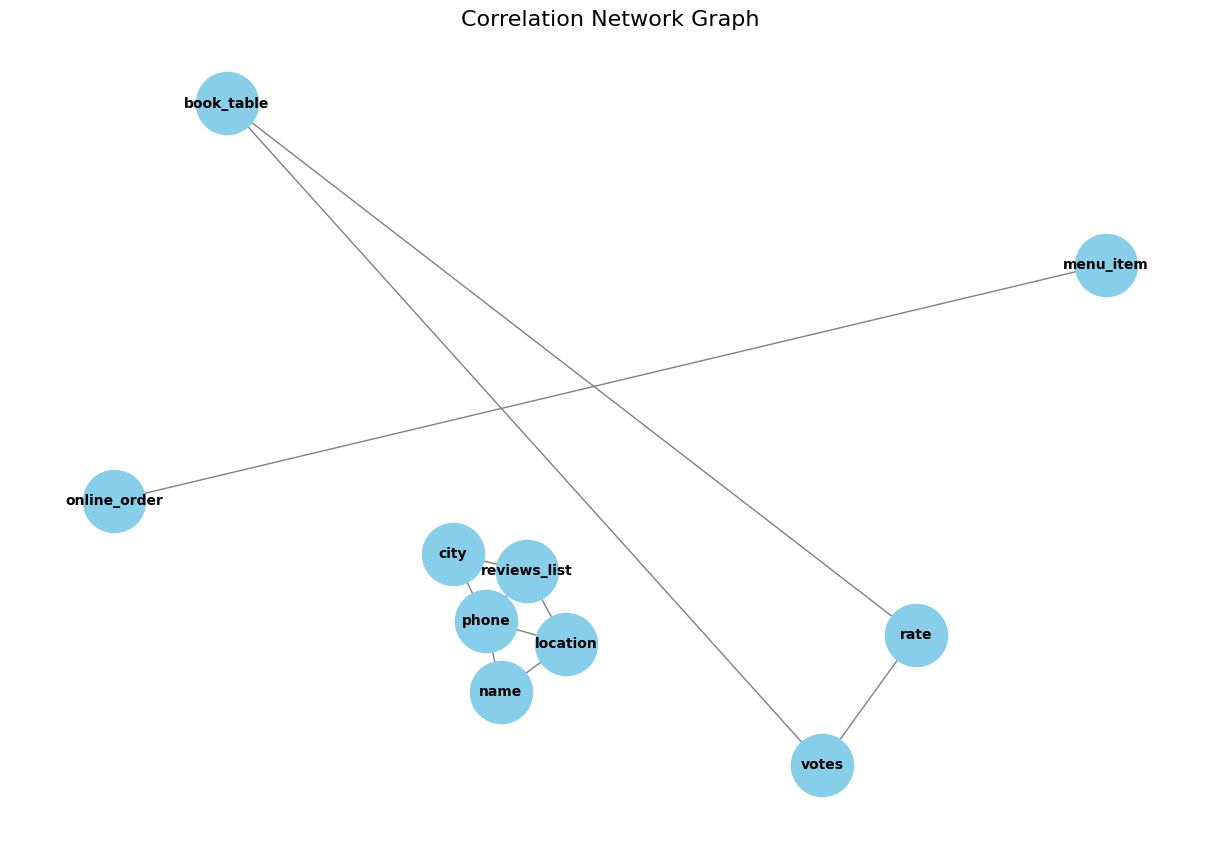

In [37]:
import networkx as nx

corr = data_en.corr(method='kendall')
G = nx.Graph()
for i in corr.columns:
    for j in corr.columns:
        if i != j and abs(corr.loc[i, j]) > 0.3:  # Add threshold to filter edges
            G.add_edge(i, j, weight=corr.loc[i, j])
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(
    G, pos, with_labels=True, node_size=2000, node_color='skyblue', 
    edge_color='gray', font_size=10, font_weight='bold'
)
plt.title("Correlation Network Graph", fontsize=16)
plt.show()

## Donut chart

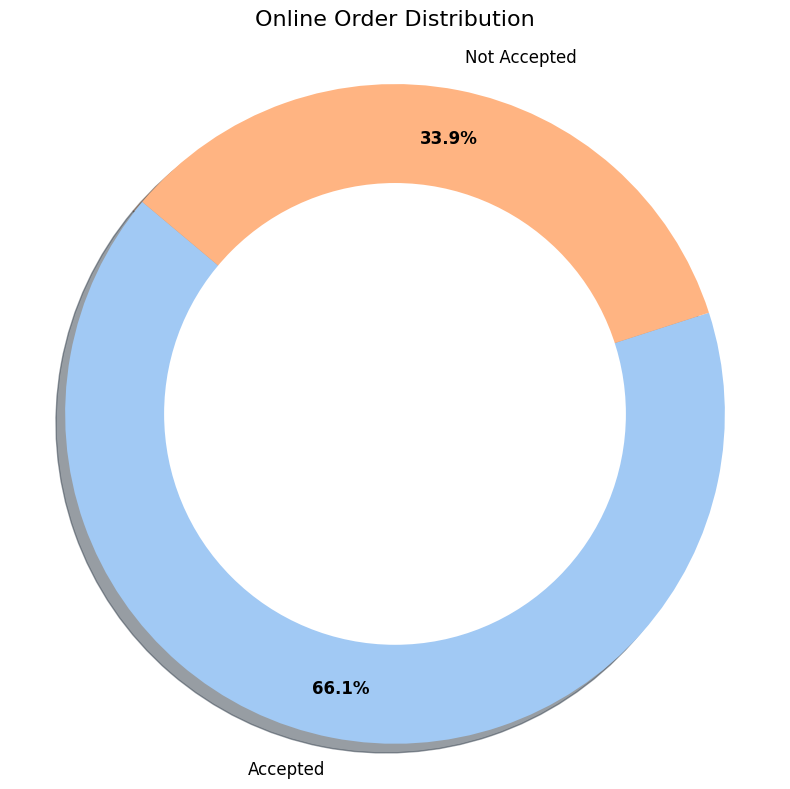

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
labels = ["Accepted", "Not Accepted"]
values = data['online_order'].value_counts().values
colors = sns.color_palette("pastel")[:2]  # Soft pastel colors for a modern look

# Create a donut chart for uniqueness
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    values, 
    labels=labels, 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=140, 
    colors=colors, 
    pctdistance=0.85  # Adjust placement of percentages
)

# Add a white circle in the middle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Customize the chart
plt.title("Online Order Distribution", fontsize=16, pad=20)
plt.setp(autotexts, size=12, weight="bold", color="black")  # Bold percentage text
plt.setp(texts, size=12)  # Labels

# Remove the frame for a cleaner look
ax.axis('equal')  # Equal aspect ratio ensures the pie is a circle

# Display the chart
plt.tight_layout()
plt.show()


## Restaurant allwing table booking or not

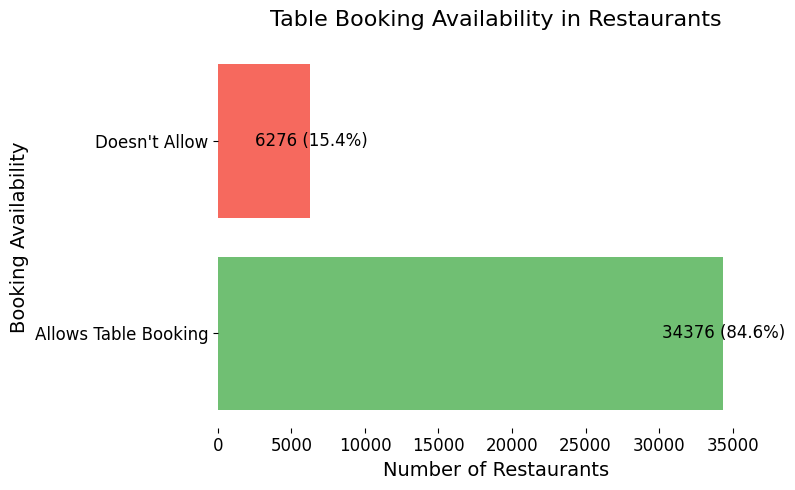

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = data['book_table'].value_counts()
labels = ["Allows Table Booking", "Doesn't Allow"]
values = counts.values
percentages = [f"{100 * v / sum(values):.1f}%" for v in values]
plt.figure(figsize=(8, 5))
bars = plt.barh(labels, values, color=['#4caf50', '#f44336'], alpha=0.8)
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height() / 2,f"{int(bar.get_width())} ({percentage})", ha='center', va='center', fontsize=12, color='black')
plt.title('Table Booking Availability in Restaurants', fontsize=16, pad=15)
plt.xlabel('Number of Restaurants', fontsize=14)
plt.ylabel('Booking Availability', fontsize=14)
plt.xlim(0, max(values) * 1.1)  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True) 
# Display the plot
plt.tight_layout()
plt.show()

## Table Booking rate VS Noraml rate

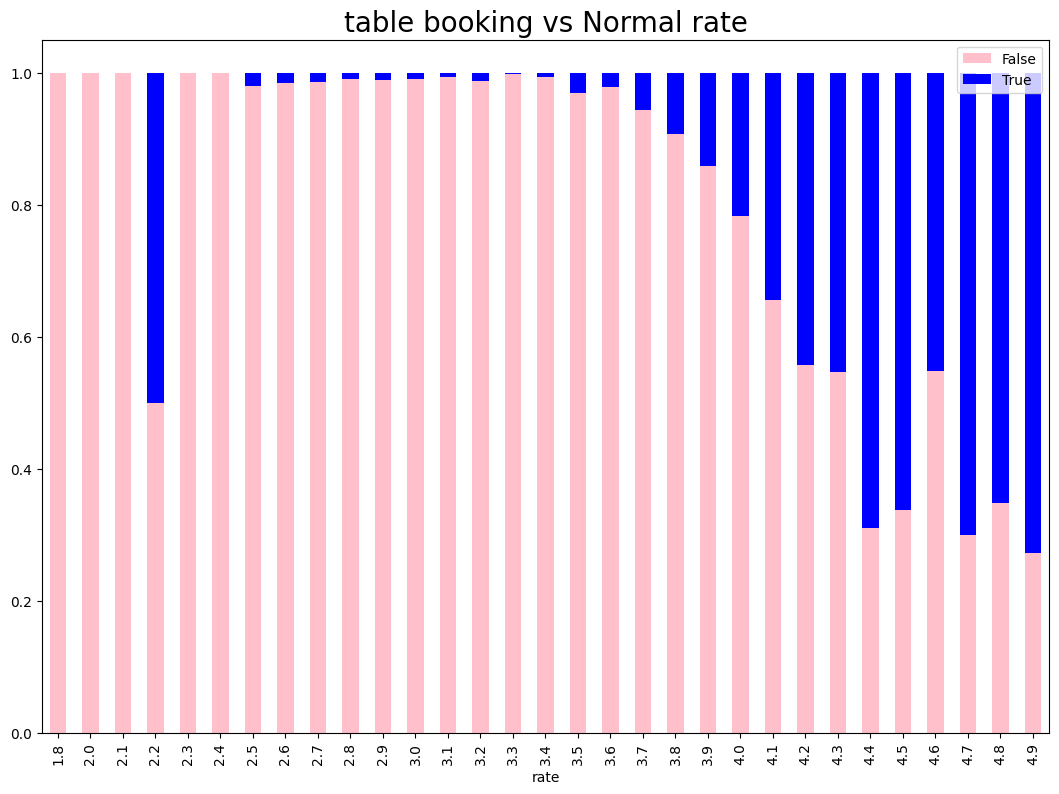

In [40]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(data['rate'], data['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['pink','blue'])
plt.title('table booking vs Normal rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

## Location

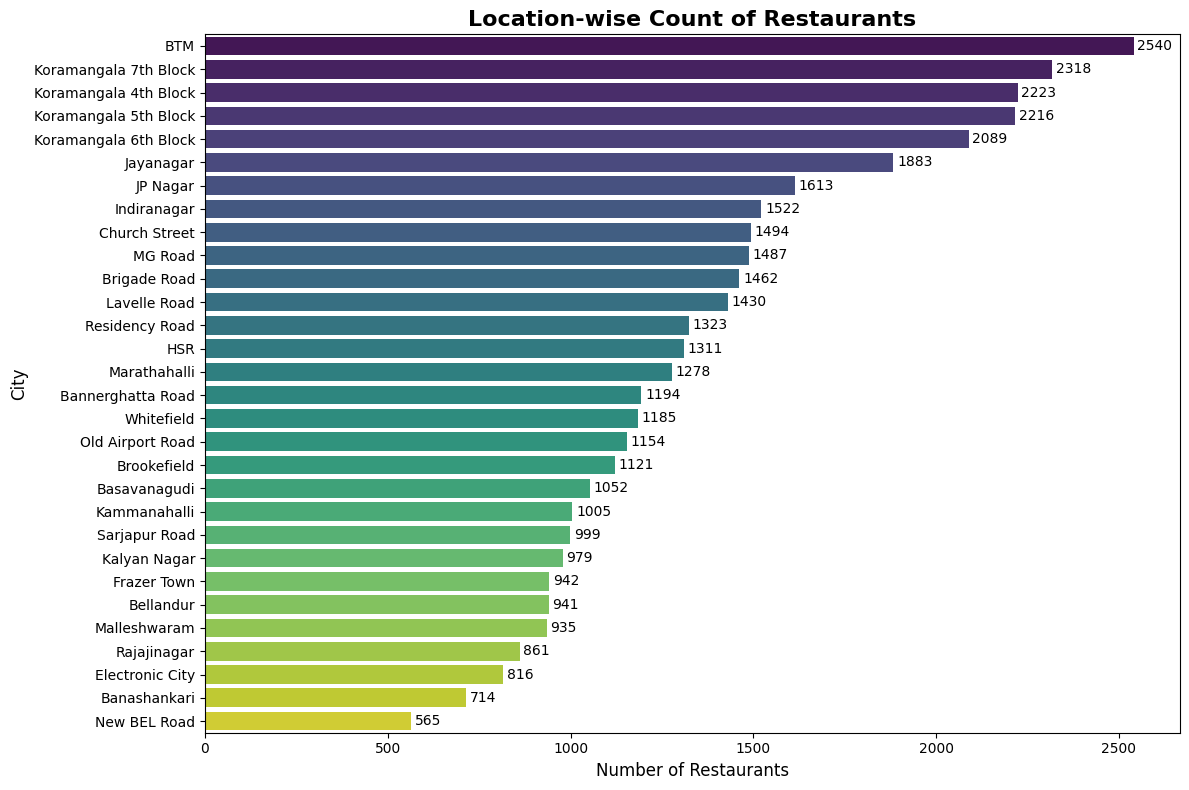

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a horizontal bar chart for city-based restaurant count
city_counts = data['city'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=city_counts.index, x=city_counts.values, palette='viridis')

# Title and labels
plt.title('Location-wise Count of Restaurants', fontsize=16, fontweight='bold')
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('City', fontsize=12)

# Add value annotations to the bars
for i, count in enumerate(city_counts.values):
    plt.text(count + 10, i, str(count), va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


## Gaussioan rest type and ratings

Missing Values:
 rate         0
rest_type    0
dtype: int64


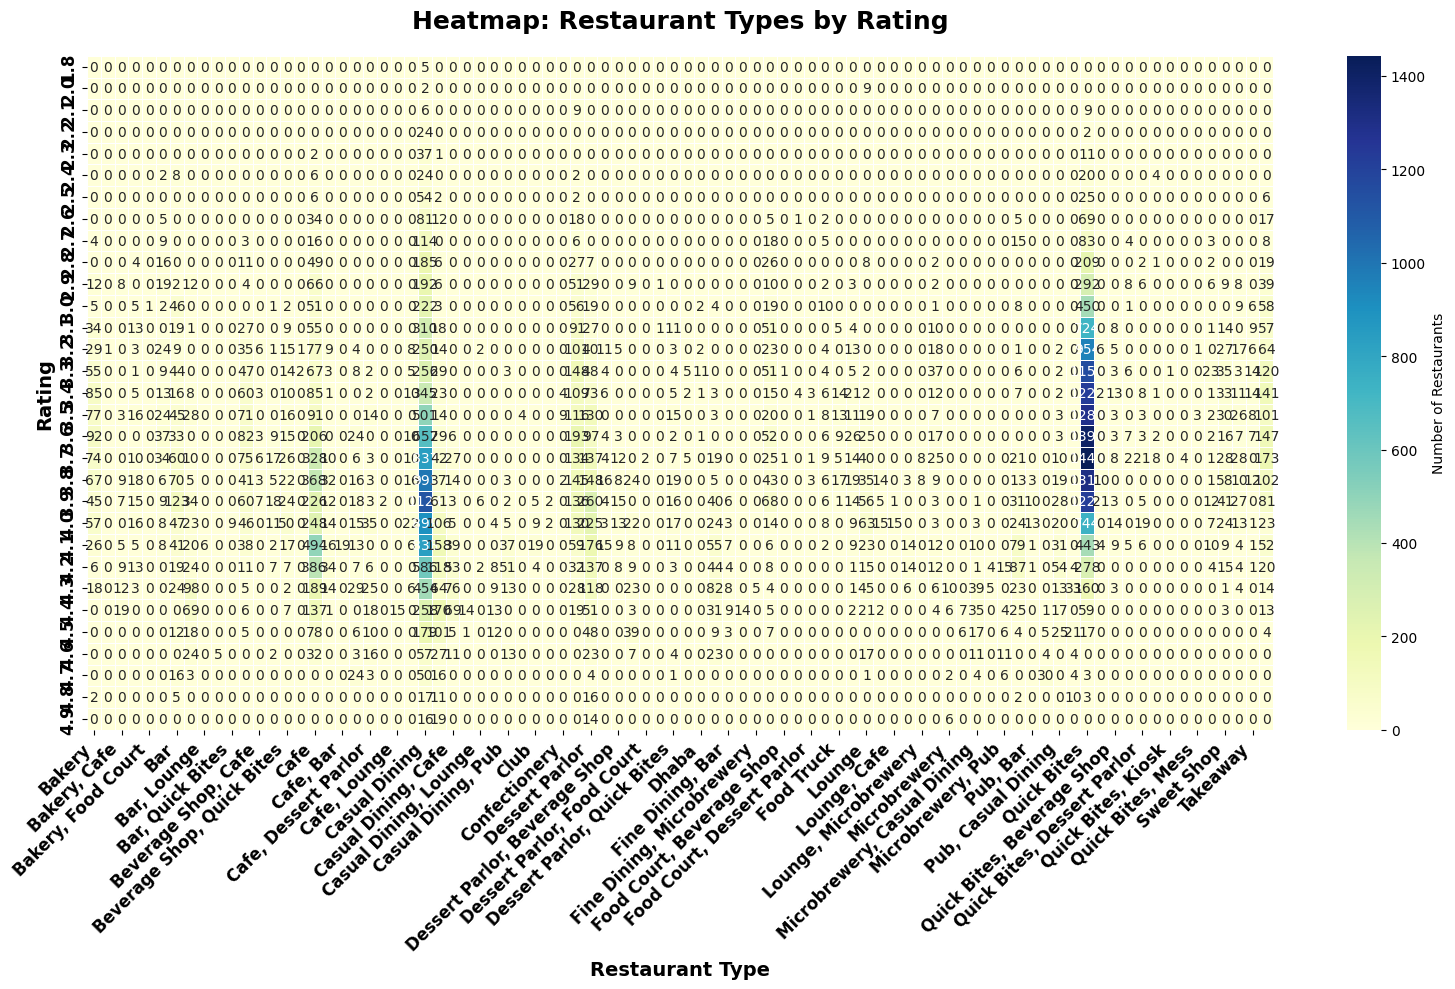

In [42]:
# Check for missing values in 'rate' and 'rest_type'
missing_values = data[['rate', 'rest_type']].isnull().sum()
print("Missing Values:\n", missing_values)
data = data.dropna(subset=['rate', 'rest_type'])
loc_plt = pd.crosstab(data['rate'], data['rest_type'])
plt.figure(figsize=(16, 10))
sns.heatmap(
    loc_plt, 
    annot=True,      # Display the values in the heatmap cells
    fmt='d',         # Format as integers
    cmap='YlGnBu',   # Color palette
    linewidths=0.5,  # Add gridlines between cells
    cbar_kws={'label': 'Number of Restaurants'}  # Colorbar label
)
plt.title('Heatmap: Restaurant Types by Rating', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Restaurant Type', fontsize=14, fontweight='bold')
plt.ylabel('Rating', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold', rotation=45, ha='right')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

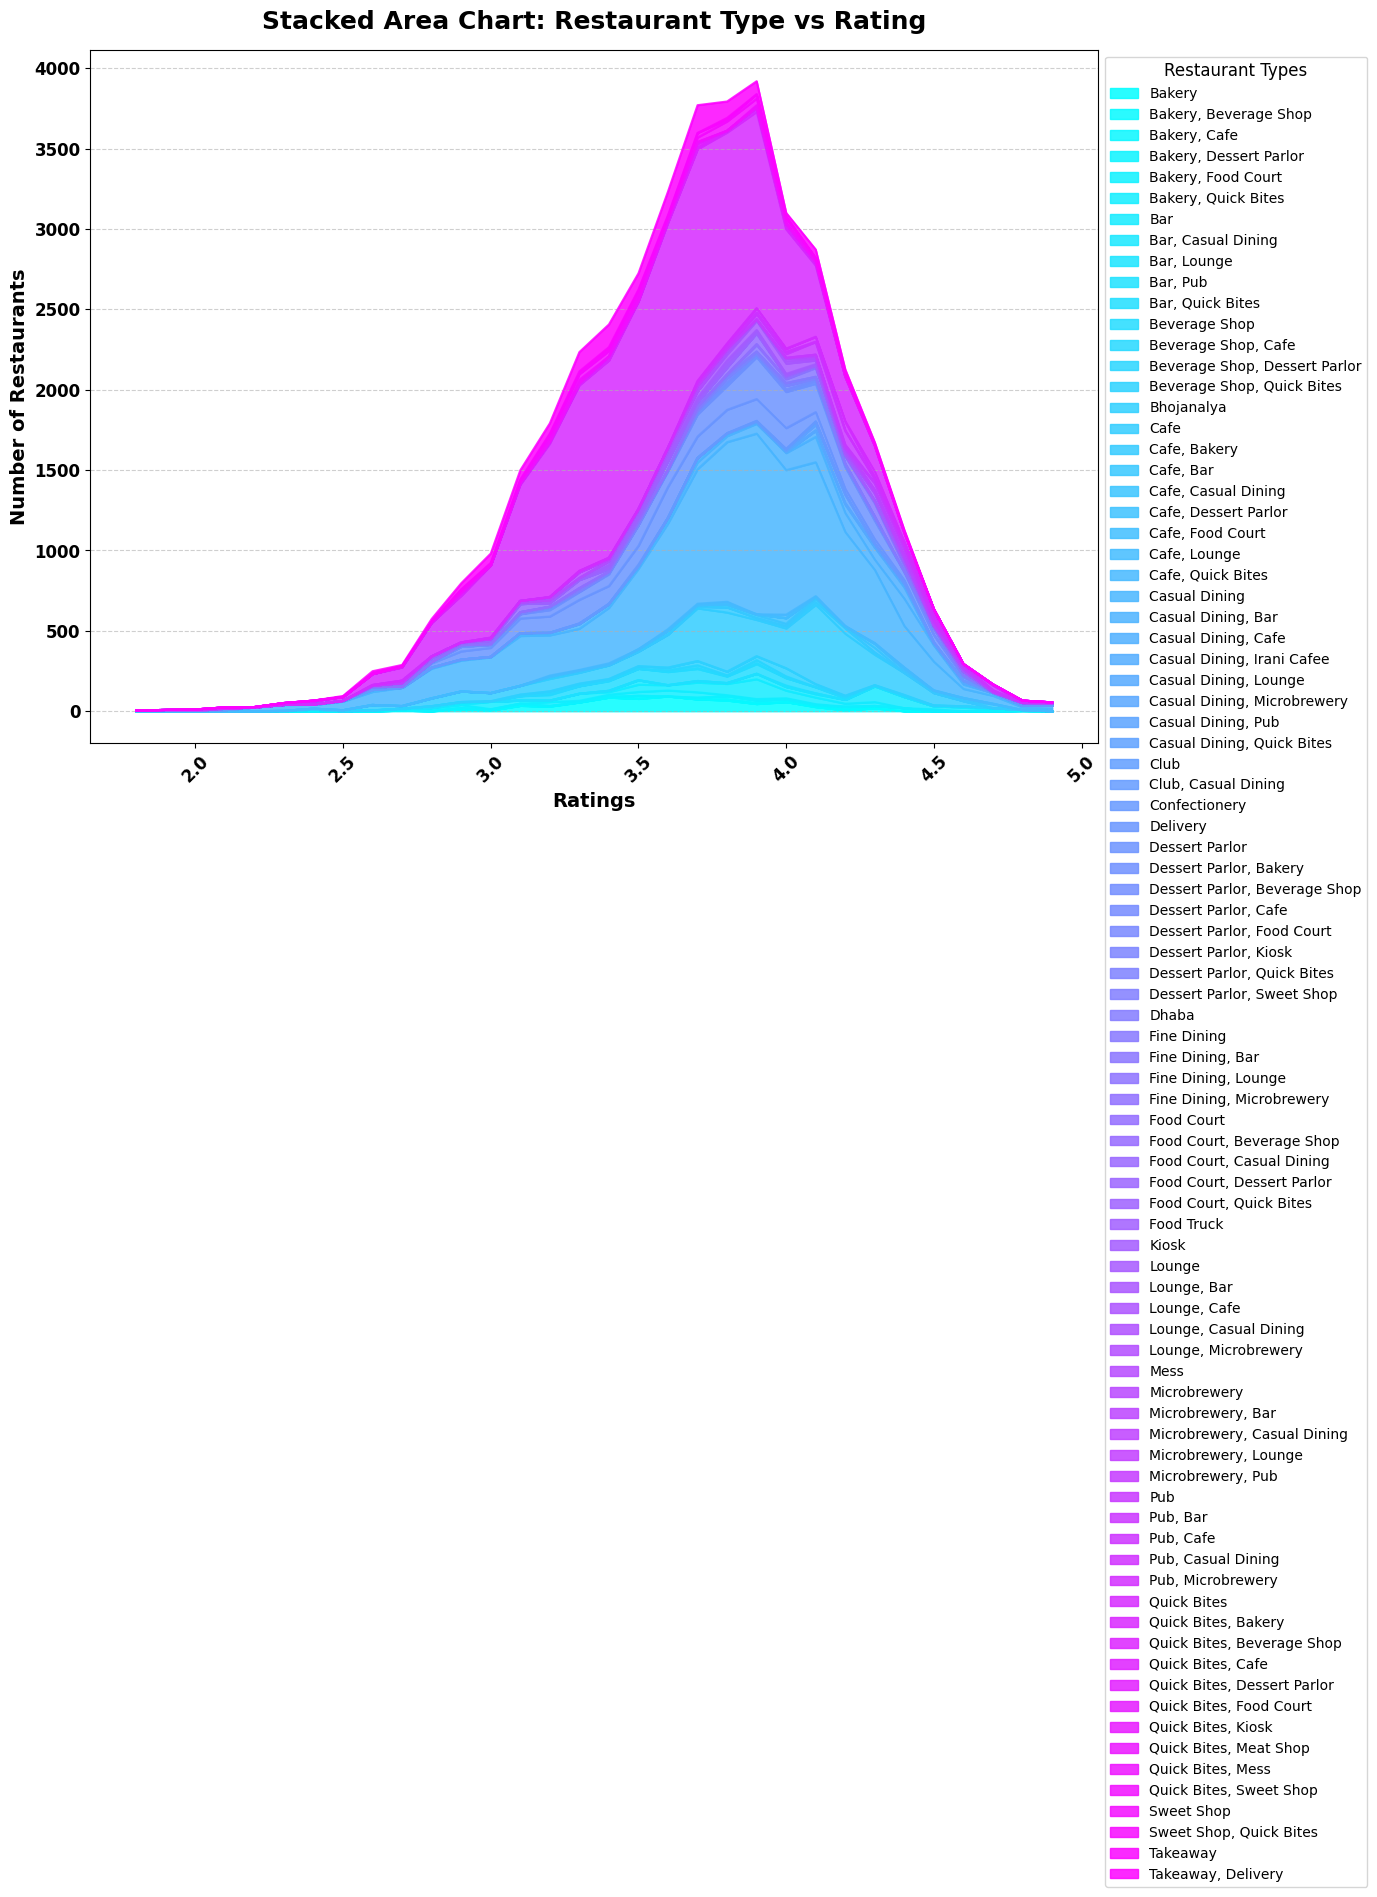

In [43]:
loc_plt = pd.crosstab(data['rate'], data['rest_type'])
plt.figure(figsize=(14, 8))
loc_plt.plot(
    kind='area',
    stacked=True,
    alpha=0.85,
    color=sns.color_palette('cool', len(loc_plt.columns))
)
plt.title('Stacked Area Chart: Restaurant Type vs Rating', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Ratings', fontsize=14, fontweight='bold')
plt.ylabel('Number of Restaurants', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold', rotation=45)
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(
    title='Restaurant Types',
    fontsize=10,
    title_fontsize=12,
    loc='upper left',
    bbox_to_anchor=(1, 1)
)
plt.tight_layout()
plt.show()

## Type of services

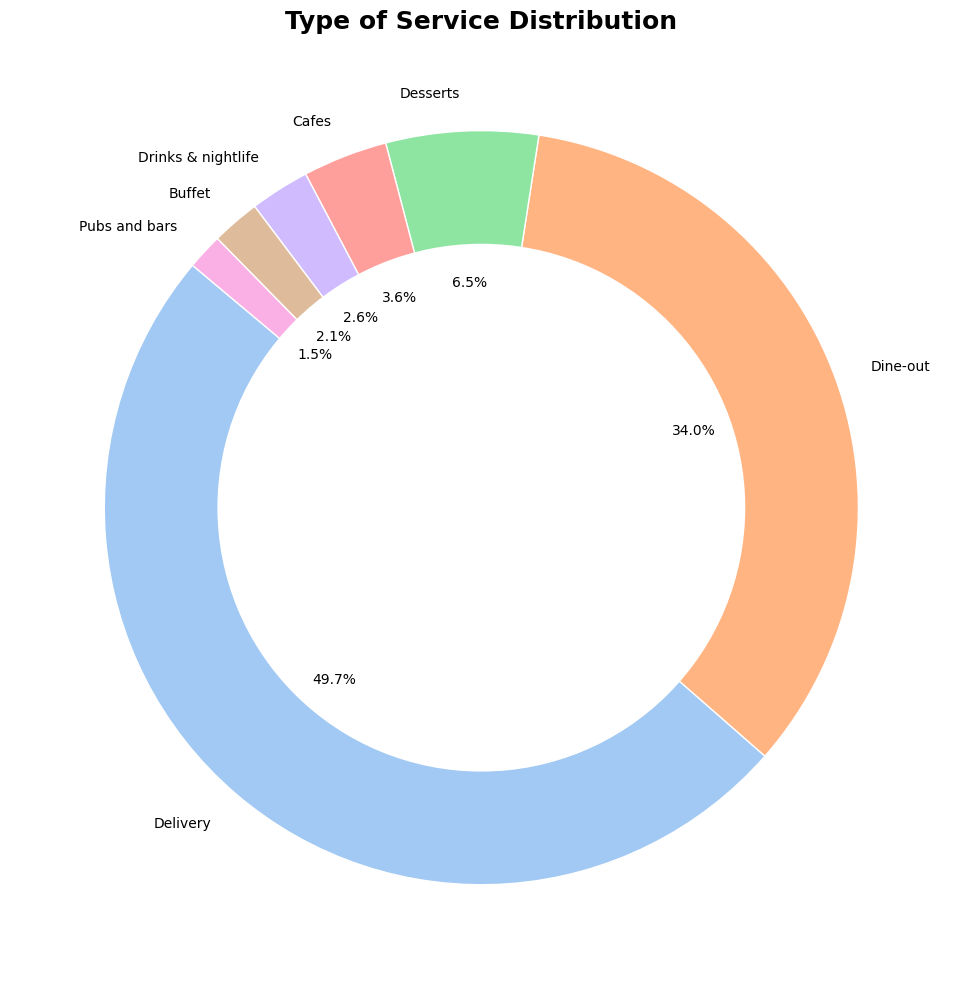

In [44]:
service_counts = data['type'].value_counts()
plt.figure(figsize=(10, 10))
colors = sns.color_palette('pastel')[0:len(service_counts)]
plt.pie(service_counts, labels=service_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
# Add a white circle to create the donut effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(center_circle)
plt.title('Type of Service Distribution', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

## Type of Rating

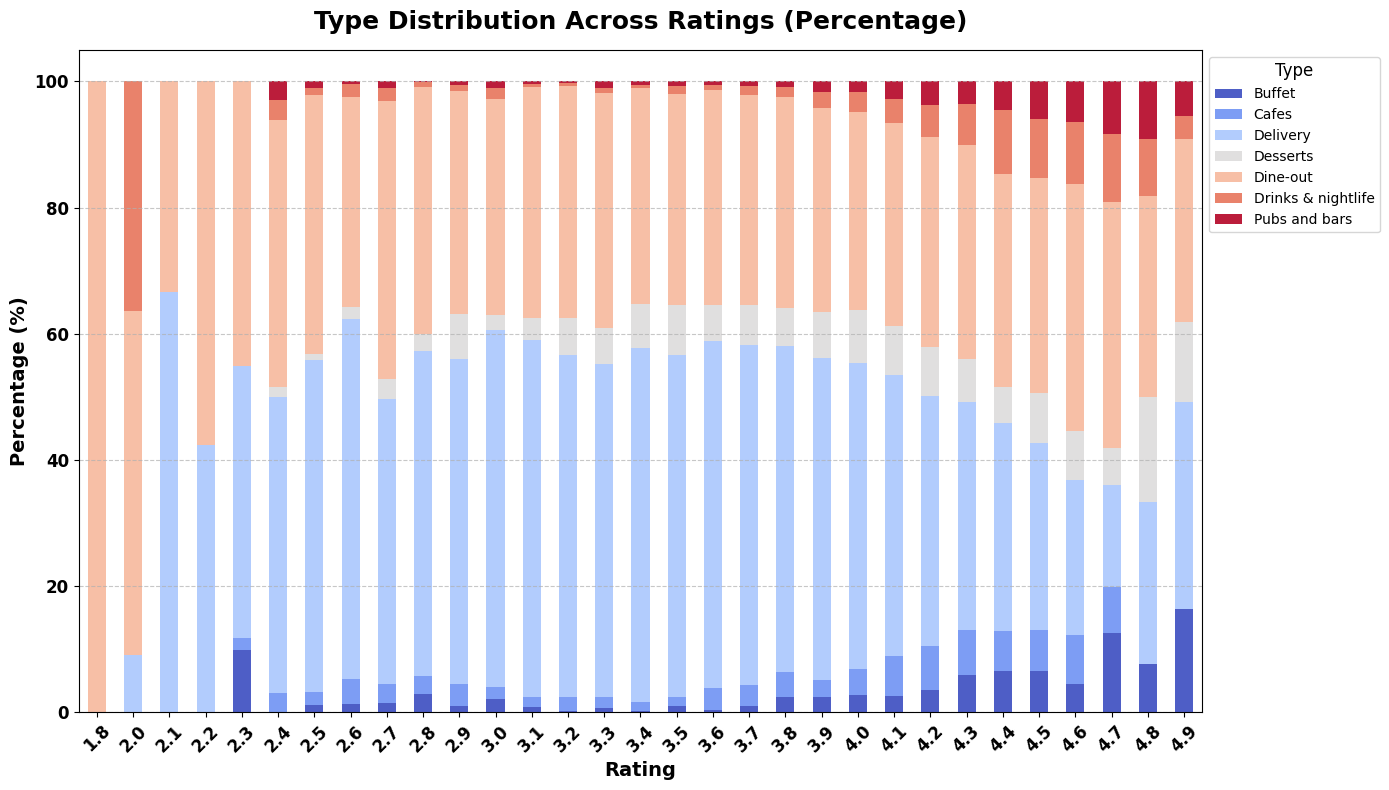

In [45]:
type_plt = pd.crosstab(data['rate'], data['type'])
type_plt_percentage = type_plt.div(type_plt.sum(axis=1), axis=0) * 100
plt.figure(figsize=(14, 8))
type_plt_percentage.plot(kind='bar', stacked=True, colormap='coolwarm', alpha=0.9, ax=plt.gca())
plt.title('Type Distribution Across Ratings (Percentage)', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Rating', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold', rotation=45)
plt.yticks(fontsize=12, fontweight='bold')
plt.legend(title='Type', fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Number of Restaurants in a Location

Text(0.5, 1.0, 'NO. of restaurants in a Location')

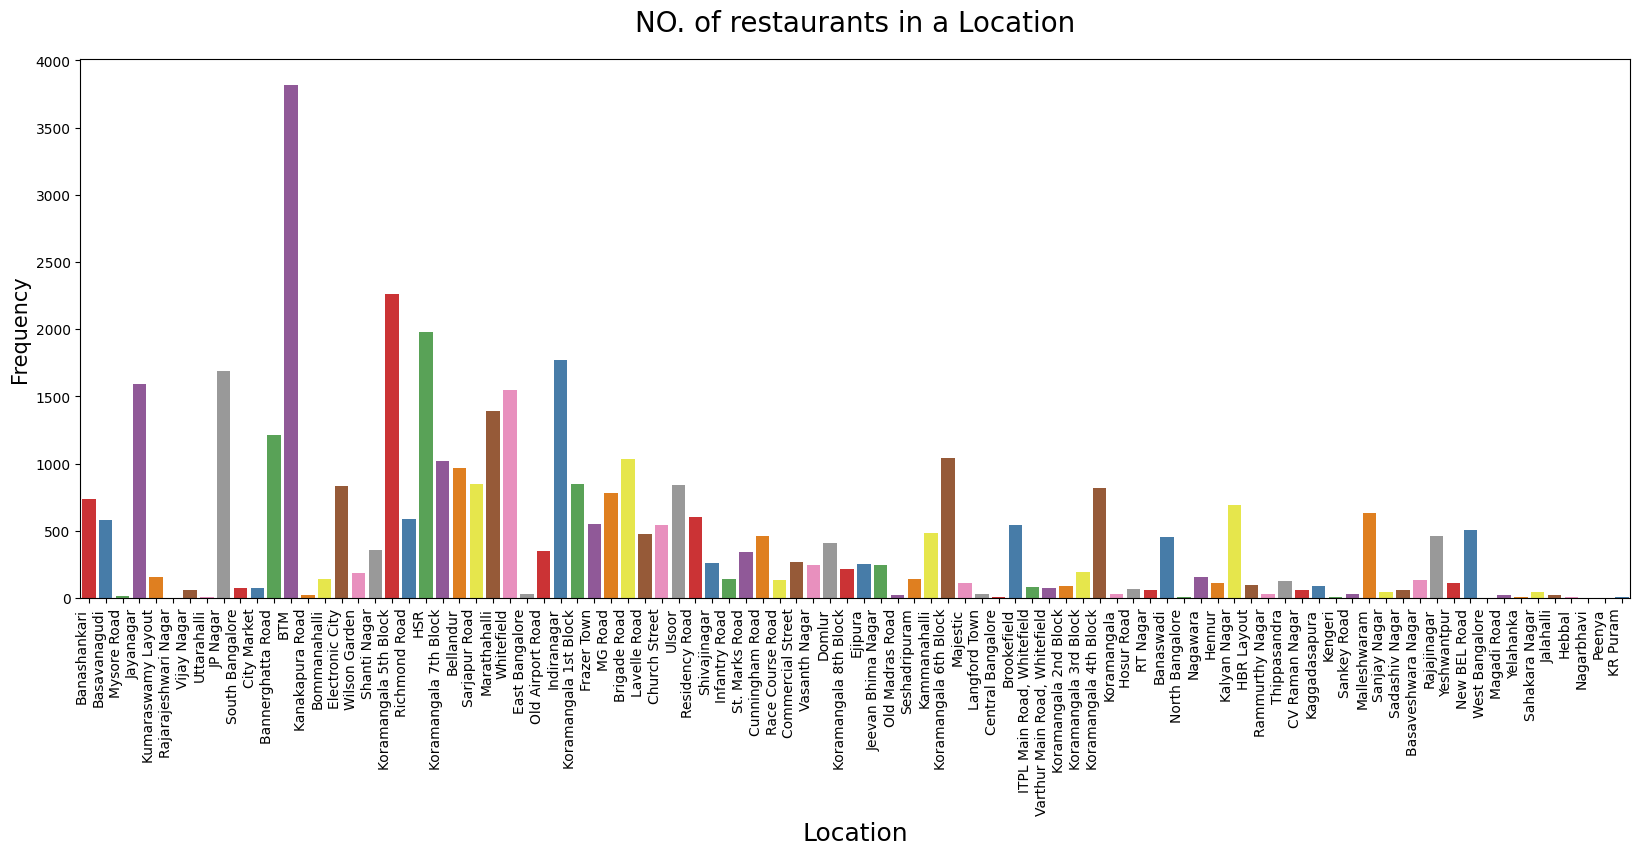

In [46]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=data, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

## Restaurant Type

Text(0.5, 1.0, 'Restaurant types')

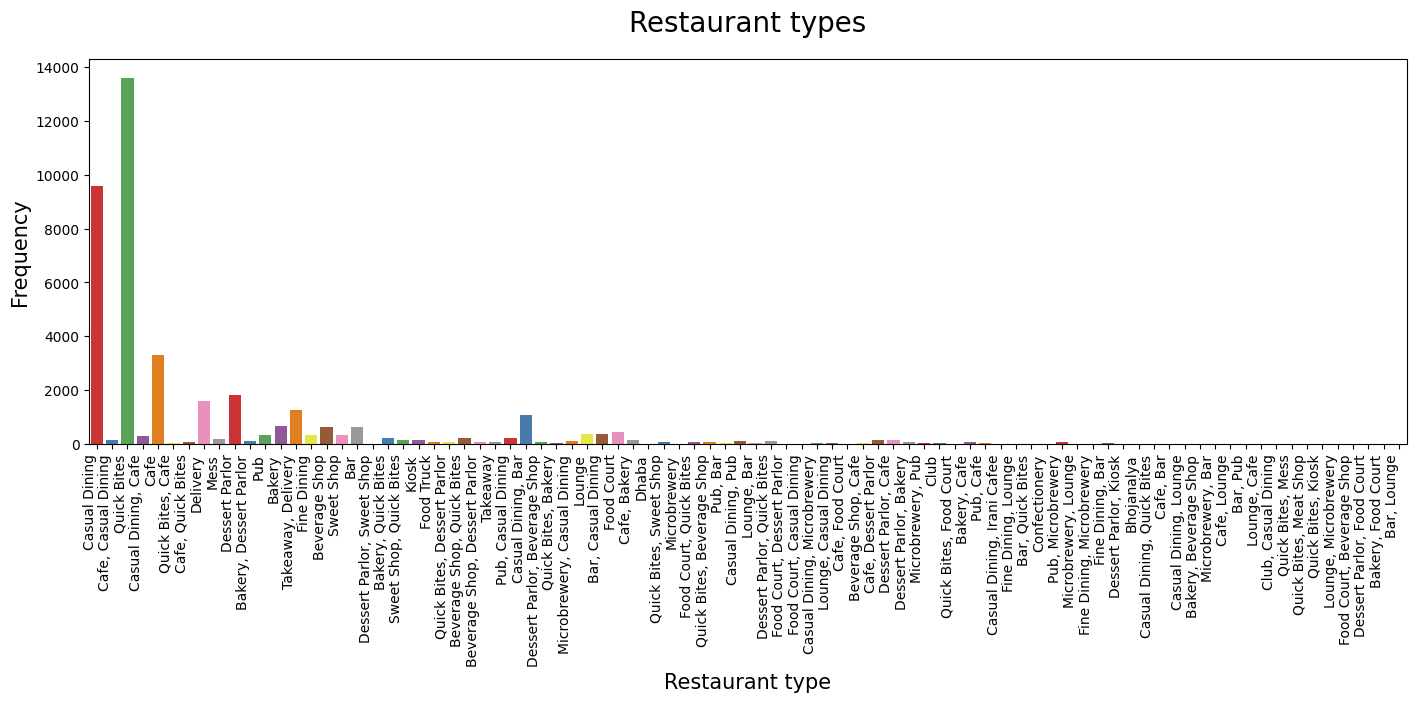

In [47]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=data, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

## Most famous Restaurant chains in Bengaluru

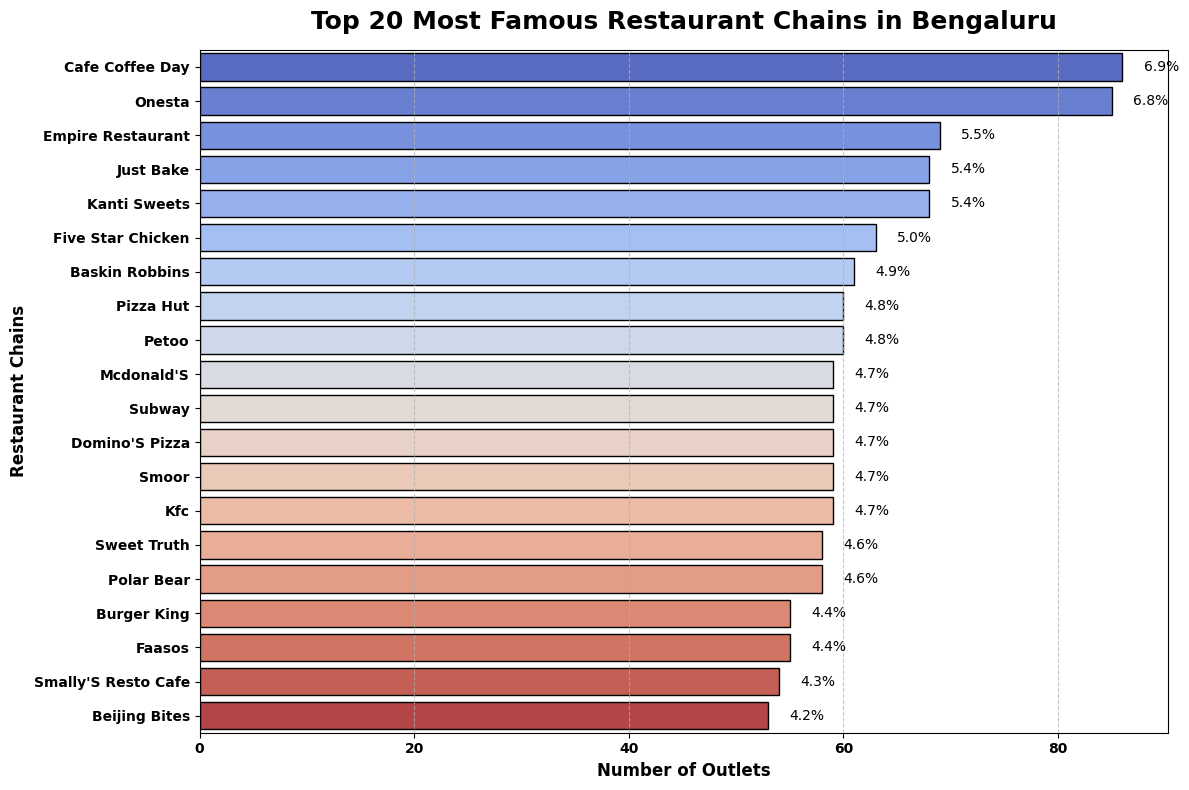

In [48]:
chains = data['name'].value_counts()[:20]
percentages = (chains / chains.sum() * 100).round(1)
plt.figure(figsize=(12, 8))
sns.barplot(
    x=chains.values, 
    y=chains.index, 
    palette='coolwarm', 
    edgecolor='black', 
    linewidth=1
)
for i, (count, percent) in enumerate(zip(chains.values, percentages)):
    plt.text(count + 2, i, f'{percent}%', va='center', fontsize=10, color='black')
plt.title("Top 20 Most Famous Restaurant Chains in Bengaluru", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Number of Outlets", fontsize=12, fontweight='bold')
plt.ylabel("Restaurant Chains", fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Models

In [49]:
x = data_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = data_en['rate']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()

book_table  rate  phone  location  rest_type  cuisines   cost  \
10218           1   3.7   3086        42          2        29  250.0   
40617           1   3.7  10659        25         32       236    2.0   
37753           1   3.2   2841        21          7        53  300.0   
3181            1   3.8   1890        22          2       311  700.0   
4228            1   3.5   2527        28         12       442  400.0   

       menu_item  
10218       2022  
40617          0  
37753          0  
3181           0  
4228         729

## Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

reg = LinearRegression()

reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

r2 = r2_score(y_test, y_pred)

print(f"R-squared Score: {r2:.4f}")

R-squared Score: 1.0000


## 2.LASSO REGRESSION

In [51]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize LassoCV without the 'normalize' parameter
lassocv = LassoCV(cv=10, max_iter=10000)

# Fit the LassoCV model to find the best alpha
lassocv.fit(x_train_scaled, y_train)

# Use the best alpha from LassoCV to fit the Lasso model
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train_scaled, y_train)

# Evaluate the R-squared score on the test set
r2 = r2_score(y_test, lasso.predict(x_test_scaled))
print(f"Optimal alpha: {lassocv.alpha_}")
print(f"R-squared score: {r2}")

Optimal alpha: 0.0004404858559712108
R-squared score: 0.9999989999518628


## 3.DecisionTreeRegressor

In [52]:
from sklearn.tree import DecisionTreeRegressor


DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

1.0

## 4.Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor

RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)

RForest.fit(x_train,y_train)

y_predict=RForest.predict(x_test)

r2_score(y_test,y_predict)

0.9999999999820289

## 5.ExtraTreesRegressor

In [54]:
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)


r2_score(y_test,y_predict)

0.9999999577496345

## 6.GradientBoostingRegressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

y_predict=gbr.predict(x_test)



r2_score(y_test,y_predict)

0.9999999959555638

## 7.XGBRegressor

In [56]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(x_train, y_train)
y_predict=xgb.predict(x_test)

r2_score(y_test,y_predict)

0.9999999995809119

In [57]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest','Extra Tree Regressor', 'Gradient Boost', 'XgBoost'],
    'Score' : [reg.score(x_test, y_test), lasso.score(x_test, y_test), DTree.score(x_test, y_test), RForest.score(x_test, y_test), ETree.score(x_test, y_test),
               gbr.score(x_test, y_test), xgb.score(x_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

Model      Score
0     Linear Regression   1.000000
2         Decision Tree   1.000000
3         Random Forest   1.000000
6               XgBoost   1.000000
5        Gradient Boost   1.000000
4  Extra Tree Regressor   1.000000
1      Lasso Regression -13.536072

In [58]:
print ("Thank you!!!!!!!")

Thank you!!!!!!!
